In [67]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np

In [68]:
trainDir = 'LP-IV-datasets/CIFR(Ass2&3)/'
testDir = 'LP-IV-datasets/CIFR(Ass2&3)/'

In [69]:
df = pd.read_csv('LP-IV-datasets/CIFR(Ass2&3)/train_data.csv')

In [70]:
df.shape

(50000, 3073)

In [71]:
df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,59,62,63,43,46,45,50,48,43,68,...,216,184,140,151,118,84,123,92,72,6
1,154,177,187,126,137,136,105,104,95,102,...,143,133,139,143,134,142,143,133,144,9
2,255,255,255,253,253,253,253,253,253,253,...,78,85,83,79,85,83,80,86,84,9
3,28,25,10,37,34,19,38,35,20,42,...,54,47,28,63,56,37,72,65,46,4
4,170,180,198,168,178,196,177,185,203,183,...,75,79,82,71,75,78,73,77,80,1


In [72]:
df_test = pd.read_csv('LP-IV-datasets/CIFR(Ass2&3)/test_data.csv')

In [89]:
test_f = df_test.iloc[:,:-1]
test_l = df_test.iloc[:,-1]
test_f.shape
test_f = np.array(test_f).reshape(-1,32,32,3)

In [91]:
test_l = to_categorical(test_l,num_classes=10)

In [73]:
df_train = df.iloc[:,:-1]
labels = df.iloc[:,-1]

In [74]:
df_train.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3062,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071
0,59,62,63,43,46,45,50,48,43,68,...,104,216,184,140,151,118,84,123,92,72
1,154,177,187,126,137,136,105,104,95,102,...,136,143,133,139,143,134,142,143,133,144
2,255,255,255,253,253,253,253,253,253,253,...,79,78,85,83,79,85,83,80,86,84
3,28,25,10,37,34,19,38,35,20,42,...,38,54,47,28,63,56,37,72,65,46
4,170,180,198,168,178,196,177,185,203,183,...,78,75,79,82,71,75,78,73,77,80


In [75]:
labels.shape

(50000,)

In [76]:
features = np.array(df_train).reshape(-1,32,32,3)

In [77]:
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels, num_classes=10) 
labels.shape

(50000, 10)

In [78]:
features.shape

(50000, 32, 32, 3)

In [79]:
features = features/255.0

In [80]:
features.shape

(50000, 32, 32, 3)

In [97]:
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(16,(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(8,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(32,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [98]:
model.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['accuracy'])

In [99]:
history = model.fit(features,labels,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 14s 9ms/step - loss: 2.1346 - accuracy: 0.2120
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.8448 - accuracy: 0.3335
Epoch 3/10
1563/1563 [==============================] - 13s 9ms/step - loss: 1.6022 - accuracy: 0.4251
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4990 - accuracy: 0.4667
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4471 - accuracy: 0.4833
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4078 - accuracy: 0.5000
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3754 - accuracy: 0.5086
Epoch 8/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.3451 - accuracy: 0.5247
Epoch 9/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3166 - accuracy: 0.5339
Epoch 10/10
1563/1563 [==============================] - 14s 9ms/step - l

In [96]:
testl,testacc = model.evaluate(test_f,test_l)

313/313 [==============================] - 2s 5ms/step - loss: 352.3505 - accuracy: 0.3555


In [100]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'loss')

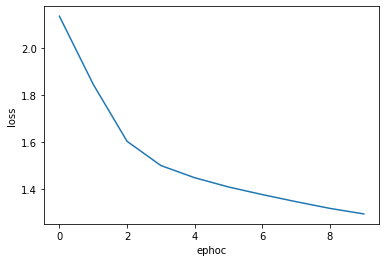

In [104]:

plt.plot(history.history['loss'])
plt.xlabel('ephoc')
plt.ylabel('loss')

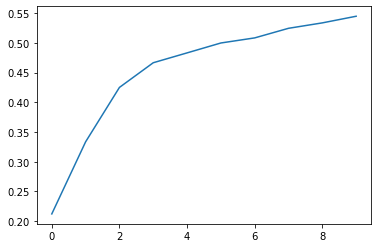

In [105]:
plt.plot(history.history['accuracy'])

In [107]:
plt.plot(history.history['val_loss'])

KeyError: 'val_loss'